# Example: LISA White Dwarf background

In [1]:
import numpy as np
import pandas as pd

data = np.loadtxt("averaged_wdwd_full.txt", delimiter=" ")
# only keep first 5000 points for speed
data = data[:5000]

FileNotFoundError: averaged_wdwd_full.txt not found.

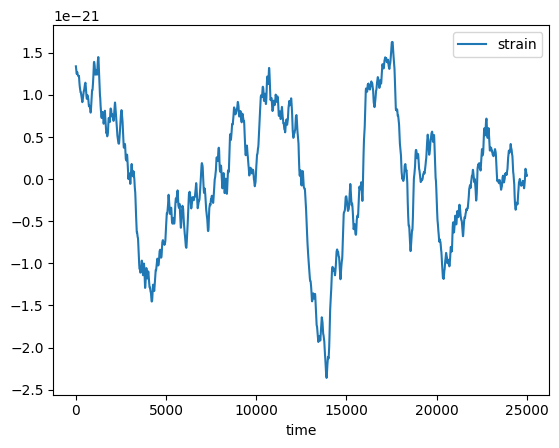

In [3]:
data = pd.DataFrame(data, columns=["time", "strain"])
data.plot(x="time", y="strain");

In [4]:
from pspline_psd.sample.gibbs_pspline_simple import gibbs_pspline_simple


mcmc = gibbs_pspline_simple(
    data=data.strain,
    Ntotal=200,
    burnin=100,
    degree=3,
    eqSpacedKnots=True,
    compute_psds=True,
)

MCMC sampling:   0%|          | 0/200 [00:00<?, ?it/s]

In [8]:
from pspline_psd.plotting.plot_psd import plot_psd

fig = plot_psd(data, mcmc.psd_quantiles)